In [0]:
import numpy as np
from numpy import matlib as matlab
from numpy.fft import fft
import math
from scipy.signal import lfilter as filter
import scipy.signal as signal
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [0]:
def my_LMS(x, d, L = 2, mu = 0.001, partida = [0 for n in range(0, 100)]): 
  #Obs: a inicialização da partida é uma gambiarra pra funcionar até 100 coeficientes... 

  nCoeffs = L
  partida = partida[0:L]

  # Construindo a matriz X dos coeficientes de x(n) ... x(n-L+1): 
  X = matlab.repmat(x.transpose(), nCoeffs, 1)
  for i in np.arange(0, nCoeffs): 
    X[i][:] = np.roll(X[i][:], [0, i-nCoeffs+1])
  X = X[:, 0:np.size(X, 1)-nCoeffs+1]

  # O mesmo com d(n)
  d = d[nCoeffs-1:d.size]
  
  # Inicialização do filtro 
  w_LMS = np.zeros((nCoeffs,1))
  w_LMS[:, 0] = partida

  # Inicialização da matriz que armazenará a evolução dos valores de w_SD
  w_LMS_hist = np.zeros((nCoeffs,X[0].size))

  for i in range(0, X[0].size): 
    y_LMS = np.dot(w_LMS.transpose(), X[:, i])
    e = d[i] - y_LMS;
    w_LMS = w_LMS + mu*X[:, i].reshape(nCoeffs,1)*e;
    w_LMS_hist[:, i] = w_LMS.reshape(nCoeffs,)

  return w_LMS, w_LMS_hist

In [0]:
def my_RLS(x, d, L = 2, lbda = 0.99, partida = [0 for n in range(0, 100)]): 
  #Obs: a inicialização da partida é uma gambiarra pra funcionar até 100 coeficientes... 

  nCoeffs = L
  partida = partida[0:L]
  delta = 100

  # Construindo a matriz X dos coeficientes de x(n) ... x(n-L+1): 
  X = matlab.repmat(x.transpose(), nCoeffs, 1)
  for i in np.arange(0, nCoeffs): 
    X[i][:] = np.roll(X[i][:], [0, i-nCoeffs+1])
  X = X[:, 0:np.size(X, 1)-nCoeffs+1]

  # O mesmo com d(n)
  d = d[nCoeffs-1:d.size]

  # Construindo a matriz P(0)

  P = delta*np.identity(nCoeffs)
  
  # Inicialização do filtro 
  w_RLS = np.zeros((nCoeffs,1))
  w_RLS[:, 0] = partida

  # Inicialização da matriz que armazenará a evolução dos valores de w_SD
  w_RLS_hist = np.zeros((nCoeffs,X[0].size))

  for i in range(0, X[0].size): 
    k = ((1/lbda)*np.dot(P, X[:, i]))/(1+(1/lbda)*np.dot(X[:, i], np.dot(P, X[:, i])))
    y_RLS = np.dot(w_RLS.transpose(), X[:, i])
    e = d[i] - y_RLS;
    w_RLS = w_RLS + e*k.reshape(nCoeffs, 1);
    w_RLS_hist[:, i] = w_RLS.reshape(nCoeffs,)
    P = (1/lbda)*P - (1/lbda)*np.dot(k.reshape(nCoeffs, 1), np.dot(X[:, i].reshape(1, nCoeffs),P))

  return w_RLS, w_RLS_hist

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


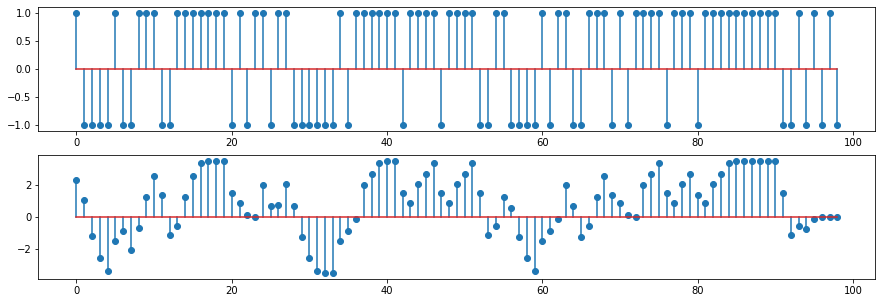

In [4]:
# Construção um sinal qualquer para aplicação do cenário

# Definições

nSamples = 10000      # Número de amostras
nCoeffs = 5           # Número de coeficientes do filtro
dNoisePower = 0.0     # Potência do ruído
h = [1, 4/3, 5/7, 3/7, 1/17]          # Coeficientes do Canal/Sistema

# Geração das amostras dos sinais transmitido, desejado e recebido

x = np.sign(np.random.randn(nSamples)) # Sinal de entrada
y = filter(h, 1, x)
d = y

fig = plt.figure(figsize = [15, 5])
plt.subplot(2, 1, 1)
plt.stem(x[1:100])
plt.subplot(2, 1, 2)
plt.stem(y[1:100])

plt.show()

[[1.        ]
 [1.33333333]
 [0.71428571]
 [0.42857143]
 [0.05882353]]


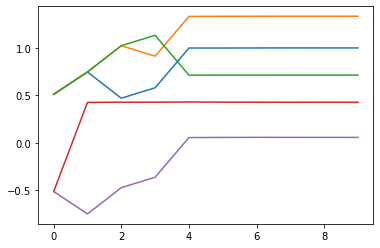

In [5]:
w, w_hist = my_RLS(x, y, L=5)

print(w)
plt.plot(w_hist.transpose()[0:10])
plt.show()